# Explore Data

In [4]:
# Opening JSON file
import json
import re
from collections import defaultdict 
import pandas as pd
import json

f = open('nsva_data/ourds_description_only.json')
data = json.load(f)
video_to_caption = defaultdict(str)
for i in data['sentences']:
    if i['video_id'] == 'video10978':
        print(i['caption'])
        if "<T3>" in i['caption']:
            x = i['caption']
            x = x.replace('<T3>_', '')
            x = x.split("; ")
            for j in range(len(x)):
                x[j] = re.sub(r'PLAYER\d+', '', x[j])
            # print(x)
            # print(i['video_id'])
            video_to_caption[i['video_id']] = x
print(video_to_caption)
# map game id
# map player
# map action
f.close()


<T1>_PLAYER202083 PLAYER1629028
<T2>_action109 action135
<T3>_MISS PLAYER202083 3PT Jump Shot ; PLAYER1629028 DEFENSIVE REBOUND 
<T4>_
defaultdict(<class 'str'>, {'video10978': ['MISS  3PT Jump Shot ', ' DEFENSIVE REBOUND ']})


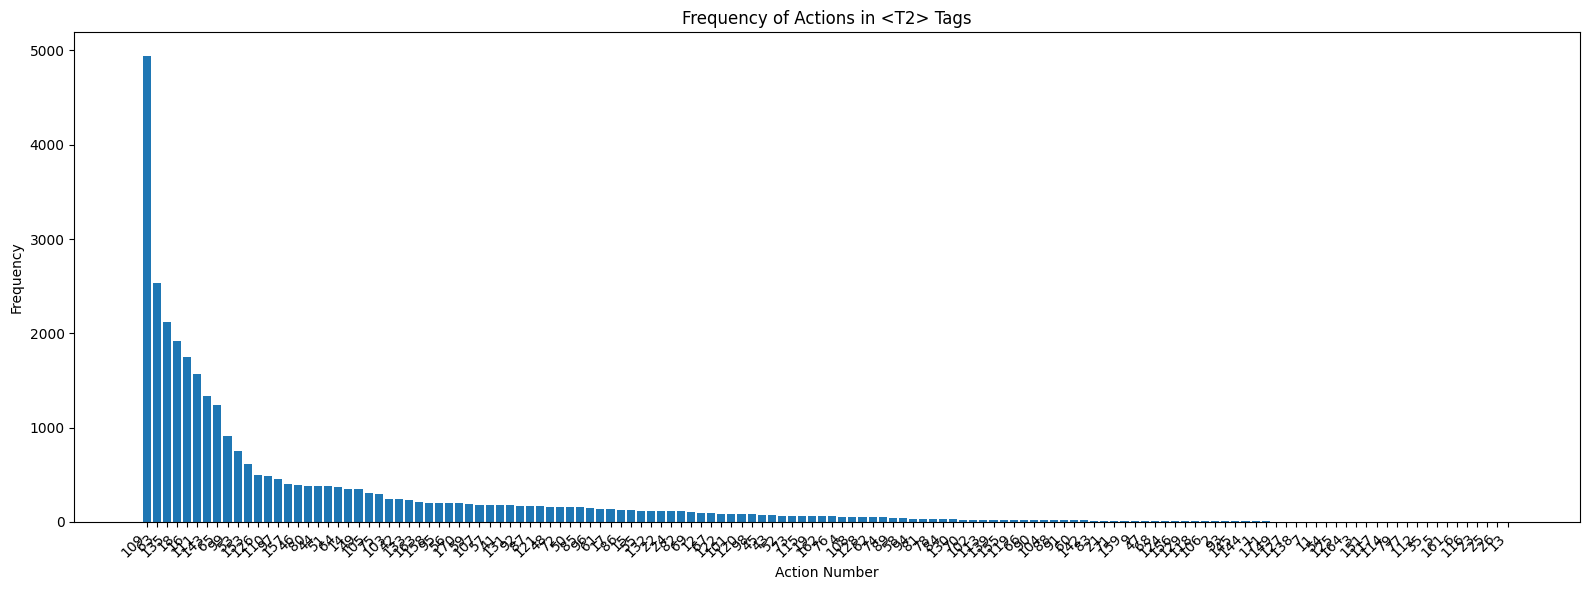

In [5]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import re

# Load the JSON data
f = open('nsva_data/ourds_description_only.json')
data = json.load(f)
f.close()

# Initialize a dictionary to store video IDs to their corresponding actions
video_to_actions = defaultdict(list)

# Iterate through the sentences in the data
for i in data['sentences']:
    if '<T2>' in i['caption']:
        # Extract the action part from the caption, assuming it follows <T2>_action<action_number>
        action = re.search(r'<T2>_action(\d+)', i['caption'])
        if action:
            # Store the action number
            action_number = action.group(1)
            video_to_actions[i['video_id']].append(action_number)

# Flatten the list of actions to count each occurrence
all_actions = [action for actions in video_to_actions.values() for action in actions]

# Count the occurrence of each action
action_counts = Counter(all_actions)

# Convert action_counts to a sorted list of (action, count) tuples for plotting
sorted_action_counts = sorted(action_counts.items(), key=lambda x: x[1], reverse=True)


# Separate the actions and their counts for plotting
actions, counts = zip(*sorted_action_counts)

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(actions, counts)
plt.title('Frequency of Actions in <T2> Tags')
plt.xlabel('Action Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# path for actions: nsva_data/NSVA/SportsFormer/action_list.json


Rebound-Normal_Rebound: 11644
Missed_Shot-Jump_Bank_Shot: 5085
Foul-Personal_Take: 2630
Made_Shot-Jump_Bank_Shot: 2553
Foul-Offensive_Charge: 1906
Missed_Shot-Layup_Shot: 1587
Turnover-Backcourt_Turnover: 1350
Made_Shot-Layup_Shot: 1249
Missed_Shot-Driving_Hook_Shot: 919
Made_Shot-Driving_Hook_Shot: 756
Turnover-Lane_Violation: 641
Missed_Shot-Jump_Shot: 525
Violation-Lane: 516
Missed_Shot-Step_Back_Bank_Jump_Shot: 501
Turnover-No_Turnover: 484
Missed_Shot-Driving_Floating_Bank_Jump_Shot: 459
Turnover-Offensive_Goaltending: 425
Made_Shot-Cutting_Finger_Roll_Layup_Shot: 394
Made_Shot-Jump_Shot: 391
Made_Shot-Step_Back_Bank_Jump_Shot: 386
Made_Shot-Alley_Oop_Layup_shot: 386
Made_Shot-Driving_Floating_Bank_Jump_Shot: 380
Foul-Non-Unsportsmanlike_Technical: 351
Made_Shot-Driving_Dunk_Shot: 349
Made_Shot-Running_Jump_Shot: 319
Missed_Shot-Finger_Roll_Layup_Shot: 313
Foul-Hanging_Technical: 292
Missed_Shot-Tip_Dunk_Shot: 270
Missed_Shot-Dunk_Shot: 247
Jump_Ball: 243
Made_Shot-Tip_Dunk_Shot: 

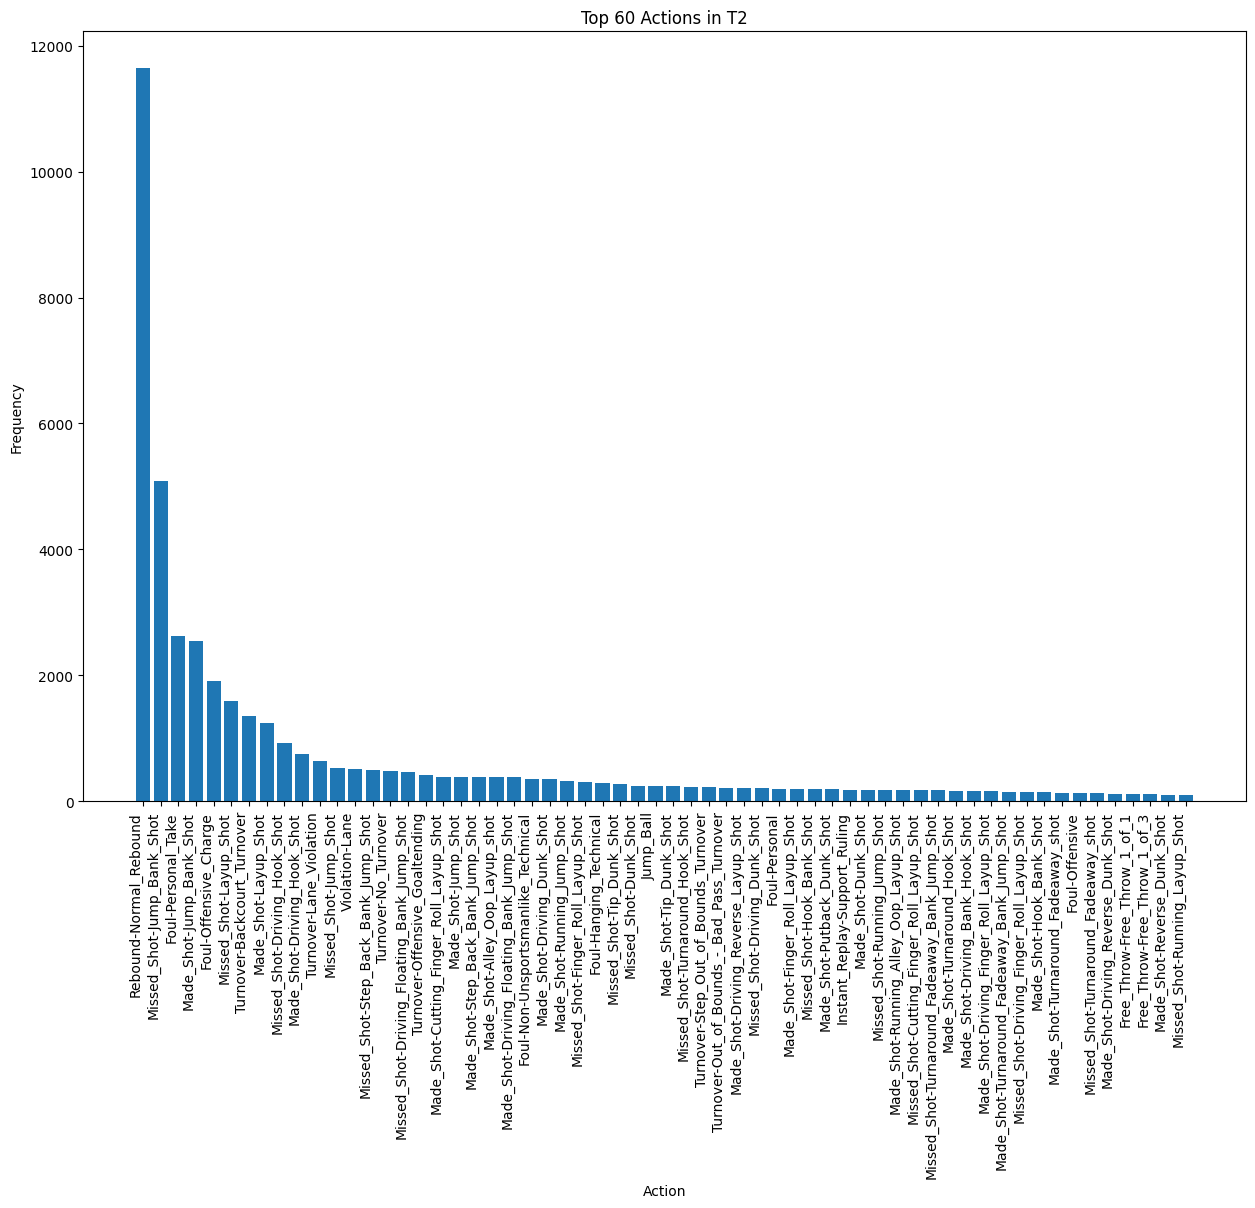

In [6]:
import json
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the JSON data for descriptions
with open('nsva_data/ourds_description_only.json') as f:
    data = json.load(f)

# Load the JSON data for action names
with open('nsva_data/NSVA/SportsFormer/action_list.json') as f:
    action_list = json.load(f)

# Initialize a dictionary to count actions
action_counts = Counter()

# Parse the dataset for actions in T2 tags
for i in data['sentences']:
    caption = i['caption']
    # Look for the T2 tag and extract actions, considering multiple actions might be present
    if "<T2>" in caption:
        actions = re.findall(r'<T2>_(action\d+(?: action\d+)*)', caption)
        for action_group in actions:
            # Splitting the action_group by space to count each action individually
            for action in action_group.split(' '):
                action_counts[action] += 1

# Convert action numbers to action names
action_counts_named = {action_list[int(action.replace('action', '')) - 1]: count for action, count in action_counts.items()}

# Get the top x actions
top_60_actions_named = sorted(action_counts_named.items(), key=lambda x: x[1], reverse=True)[:60]

# Print the top x actions and their counts, or print sorted
for action, count in top_60_actions_named:
    print(f"{action}: {count}")

# Counting total unique actions and those below a threshold
total_actions = len(action_counts_named)
actions_below_500 = sum(1 for count in action_counts_named.values() if count < 500)

print(f"Total unique actions: {total_actions}")
print(f"Actions with counts below 500: {actions_below_500}")

# Plotting the top 60 actions for visibility
actions, counts = zip(*top_60_actions_named)  # Unzip the actions and counts

plt.figure(figsize=(15, 10))  # Adjusted for better readability with more actions
plt.bar(actions, counts)
plt.title('Top 60 Actions in T2')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Adjusted rotation for better readability with more actions
plt.show()


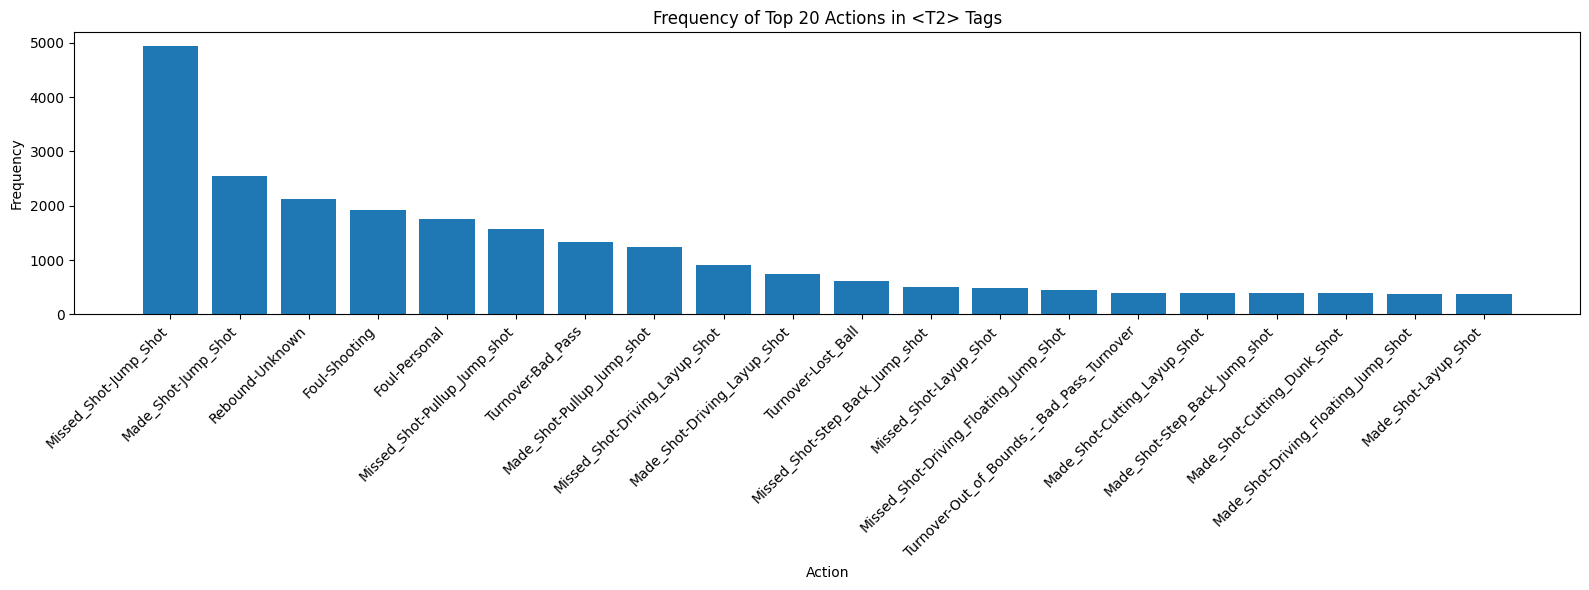

Missed_Shot-Jump_Shot: 4944
Made_Shot-Jump_Shot: 2539
Rebound-Unknown: 2119
Foul-Shooting: 1915
Foul-Personal: 1753
Missed_Shot-Pullup_Jump_shot: 1574
Turnover-Bad_Pass: 1331
Made_Shot-Pullup_Jump_shot: 1244
Missed_Shot-Driving_Layup_Shot: 908
Made_Shot-Driving_Layup_Shot: 753
Turnover-Lost_Ball: 619
Missed_Shot-Step_Back_Jump_shot: 500
Missed_Shot-Layup_Shot: 485
Missed_Shot-Driving_Floating_Jump_Shot: 457
Turnover-Out_of_Bounds_-_Bad_Pass_Turnover: 399
Made_Shot-Cutting_Layup_Shot: 393
Made_Shot-Step_Back_Jump_shot: 386
Made_Shot-Cutting_Dunk_Shot: 386
Made_Shot-Driving_Floating_Jump_Shot: 377
Made_Shot-Layup_Shot: 369
Foul-Offensive: 351
Made_Shot-Driving_Finger_Roll_Layup_Shot: 348
Missed_Shot-Floating_Jump_shot: 308
Made_Shot-Running_Layup_Shot: 295
Missed_Shot-Fadeaway_Jump_Shot: 241
Made_Shot-Alley_Oop_Dunk_Shot: 241
Missed_Shot-Turnaround_Jump_Shot: 228
Turnover-Traveling: 214
Turnover-Out_of_Bounds_Lost_Ball_Turnover: 204
Missed_Shot-Driving_Finger_Roll_Layup_Shot: 203
Made_Sh

In [7]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import re

# Load the JSON data for descriptions
with open('nsva_data/ourds_description_only.json') as f:
    data = json.load(f)

# Load the JSON data for action names
with open('nsva_data/NSVA/SportsFormer/action_list.json') as f:
    action_list = json.load(f)

# Initialize a dictionary to store video IDs to their corresponding actions
video_to_actions = defaultdict(list)

# Iterate through the sentences in the data
for i in data['sentences']:
    if '<T2>' in i['caption']:
        # Extract the action part from the caption, assuming it follows <T2>_action<action_number>
        action = re.search(r'<T2>_action(\d+)', i['caption'])
        if action:
            # Store the action number
            action_number = action.group(1)
            video_to_actions[i['video_id']].append(action_number)

# Flatten the list of actions to count each occurrence
all_actions = [action for actions in video_to_actions.values() for action in actions]

# Count the occurrence of each action
action_counts = Counter(all_actions)

# Convert action_counts to a sorted list of (action, count) tuples for plotting
sorted_action_counts = sorted(action_counts.items(), key=lambda x: x[1], reverse=True)

# Keep only the top 20 most frequent actions
top_20_action_counts = sorted_action_counts[:20]

# Map action numbers to their corresponding names
action_names = [action_list[int(action)] for action, _ in top_20_action_counts]

# Separate the actions and their counts for plotting
actions, counts = zip(*top_20_action_counts)

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(action_names, counts)
plt.title('Frequency of Top 20 Actions in <T2> Tags')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Print the action counts with their corresponding names
for action, count in sorted_action_counts:
    print(f"{action_list[int(action)]}: {count}")

# Print total unique actions
print(f"Total unique actions: {len(action_counts)}")

# Print actions with counts below 500
actions_below_500 = sum(1 for count in action_counts.values() if count < 500)
print(f"Actions with counts below 500: {actions_below_500}")

# Find missing actions
all_possible_actions = set(str(i) for i in range(1, 172))
encountered_actions = set(action_counts.keys())
missing_actions = all_possible_actions - encountered_actions

# Print missing actions or those with a count of 0
missing_or_zero_count_actions = missing_actions.union({action for action, count in action_counts.items() if count == 0})
missing_action_names = [action_list[int(action)] for action in sorted(missing_or_zero_count_actions, key=lambda x: int(x))]
print(f"Actions missing or with a count of 0 between 1 and 171: {missing_action_names}")


In [9]:
import pandas as pd

with open('nsva_data/NSVA/tools/gameid_eventid2vid.json', 'r') as file:
    gameid_data = json.load(file)
    data_tuples = [(key, value) for key, value in gameid_data.items()]
    df = pd.DataFrame(data_tuples, columns=['GAME_ID', 'VIDEO_ID'])
    df['CAPTIONS'] = df['VIDEO_ID'].apply(lambda x: video_to_caption[x])

print(df)

              GAME_ID    VIDEO_ID                                     CAPTIONS
0        0021800013-4  video10977                                             
1        0021800013-7  video10978  [MISS  3PT Jump Shot ,  DEFENSIVE REBOUND ]
2        0021800013-8  video10979                                             
3        0021800013-9  video10980                                             
4       0021800013-10  video10981                                             
...               ...         ...                                          ...
44644  0021801229-792  video16529                                             
44645  0021801229-793  video16530                                             
44646  0021801229-795  video16531                                             
44647  0021801229-797  video16532                                             
44648  0021801229-798  video16533                                             

[44649 rows x 3 columns]


In [10]:
obj = pd.read_pickle('nsva_data/ourds_videos_S3D_features.pickle')
print(obj['video0'].shape)

(16, 1024)


In [11]:
obj = pd.read_pickle('nsva_data/ourds_videos_timesformer_features.pickle')
print(obj['video0'].shape)
# 768 hidden state dimension

(13, 768)


In [17]:
with open('nsva_data/NSVA/tools/gameid_eventid2vid.json', 'r') as file:
    gameid_data = json.load(file)
    data_tuples = [(key, value) for key, value in gameid_data.items()]
    df = pd.DataFrame(data_tuples, columns=['GAME_ID', 'VIDEO_ID'])
    
df

,GAME_ID,VIDEO_ID
0,0021800013-4,video10977
1,0021800013-7,video10978
2,0021800013-8,video10979
3,0021800013-9,video10980
4,0021800013-10,video10981
...,...,...
44644,0021801229-792,video16529
44645,0021801229-793,video16530
44646,0021801229-795,video16531
44647,0021801229-797,video16532


In [ ]:
# Counts for downloaded files
import os

def count_files(directory_path):
    # List all entries in the given directory
    entries = os.listdir(directory_path)
    # Count only files (ignoring directories)
    file_count = sum(os.path.isfile(os.path.join(directory_path, entry)) for entry in entries)
    return file_count

# Example usage
folders = ['pbp_videos/train','pbp_videos/test', 'pbp_videos/val']
for i in folders:
    print(f"Number of files in '{i}': {count_files(i)}")


{'Instant_Replay': 187, 'Shot': 22526, 'Rebound': 11644, 'Foul': 5698, 'Turnover': 3539, 'Violation': 516, 'Jump_Ball': 243, 'Ejection-Other': 19, 'Free_Throw': 233, 'Timeout-Regular': 24, 'Block': 9, 'Substitution': 5, 'period-end': 6}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Instant_Replay'),
  Text(1, 0, 'Shot'),
  Text(2, 0, 'Rebound'),
  Text(3, 0, 'Foul'),
  Text(4, 0, 'Turnover'),
  Text(5, 0, 'Violation'),
  Text(6, 0, 'Jump_Ball'),
  Text(7, 0, 'Ejection-Other'),
  Text(8, 0, 'Free_Throw'),
  Text(9, 0, 'Timeout-Regular'),
  Text(10, 0, 'Block'),
  Text(11, 0, 'Substitution'),
  Text(12, 0, 'period-end')])

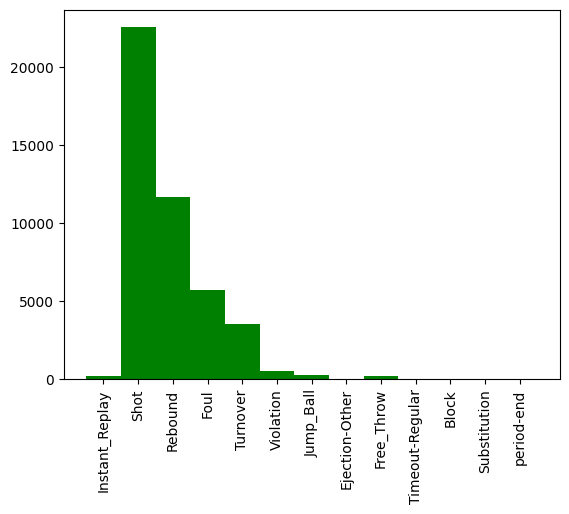

In [14]:
action_coarse = "nsva_data/NSVA/SportsFormer/data/action_list_Coarse.json"

with open(action_coarse, 'r') as file:
    action_coarse_dict = json.load(file)
mapped_actions = {}
for action, c in action_counts_named.items():
    count = action_counts_named[action]
    if action in action_coarse_dict:
        gen_action_name = action_coarse_dict[action]
    else:
        gen_action_name = action
    if gen_action_name in mapped_actions:
        mapped_actions[gen_action_name] += count
    else :
        mapped_actions[gen_action_name] = count

# with open(action_list, 'r') as file:
#     action_list = json.load(file)
# copy_action_counts = action_counts
# for action in copy_action_counts:
    
print(mapped_actions)
plt.bar(mapped_actions.keys(), mapped_actions.values(), 1.0, color='g')
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94],
 [Text(0, 0, 'Instant_Replay-Support_Ruling'),
  Text(1, 0, 'Jump_Bank_Shot'),
  Text(2, 0, 'Rebound-Normal_Rebound'),
  Text(3, 0, 'Cutting_Finger_Roll_Layup_Shot'),
  Text(4, 0, 'Putback_Dunk_Shot'),
  Text(5, 0, 'Foul-Personal_Take'),
  Text(6, 0, 'Cutting_Dunk_Shot'),
  Text(7, 0, 'Driving_Floating_Bank_Jump_Shot'),
  Text(8, 0, 'Jump_Shot'),
  Text(9, 0, 'Driving_Reverse_Dunk_Shot'),
  Text(10, 0, 'Layup_Shot'),
  Text(11, 0, 'Tur

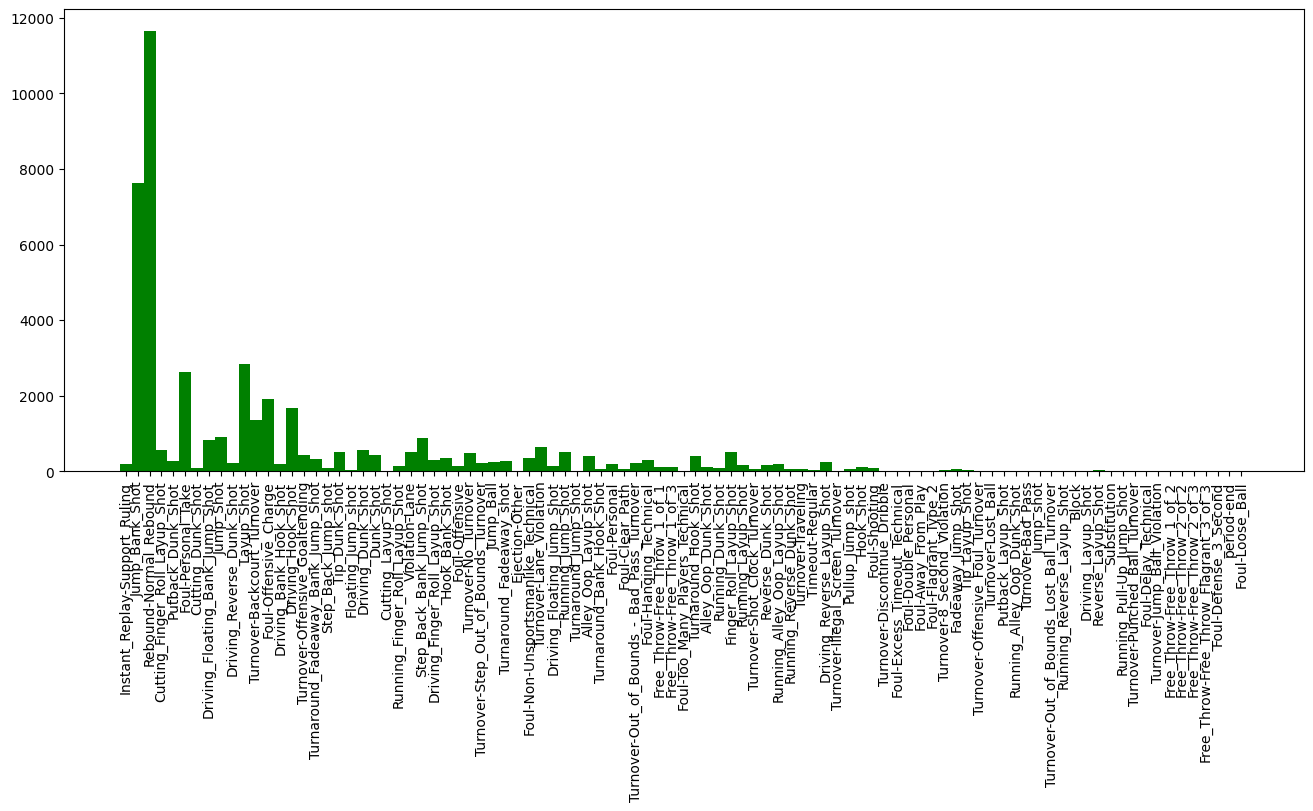

In [15]:
action_coarse = "nsva_data/NSVA/SportsFormer/data/action_list_Fine.json"

with open(action_coarse, 'r') as file:
    action_coarse_dict = json.load(file)
mapped_actions = {}

for action, c in action_counts_named.items():
    count = action_counts_named[action]
    if action in action_coarse_dict:
        gen_action_name = action_coarse_dict[action]
    else:
        gen_action_name = action
    if gen_action_name in mapped_actions:
        mapped_actions[gen_action_name] += count
    else :
        mapped_actions[gen_action_name] = count

plt.figure(figsize=(16, 6))
plt.bar(mapped_actions.keys(), mapped_actions.values(), 1.0, color='g')
plt.xticks(rotation='vertical')

# Prepare dataset

### Approach converting to tensors first (NOT PRACTICAL FOR STORAGE)

In [ ]:
# import json
# import numpy as np
# import cv2

# import torch
# from torch.utils.data import Dataset
# from torchvision import transforms
# def VideoToTensor(game_id, data_dir="dataset/examples/", output_dir="tensor-dataset/", max_len=None, fps=None, padding_mode=None):
#     # open video file
#     # path = data_dir + video_id + ".mp4"
#     path = "nsva_data/NSVA/tools/pbp_videos/train/0021801229-99.mp4"
#     cap = cv2.VideoCapture(path)
#     assert (cap.isOpened())

#     channels = 3

#     # calculate sample_factor to reset fps
#     sample_factor = 1
#     if fps:
#         old_fps = cap.get(cv2.CAP_PROP_FPS)  # fps of video
#         sample_factor = int(old_fps / fps)
#         assert (sample_factor >= 1)

#     # init empty output frames (C x L x H x W)
#     height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#     time_len = None
#     if max_len:
#         # time length has upper bound
#         if padding_mode:
#             # padding all video to the same time length
#             time_len = max_len
#         else:
#             # video have variable time length
#             time_len = min(int(num_frames / sample_factor), max_len)
#     else:
#         # time length is unlimited
#         time_len = int(num_frames / sample_factor)

#     frames = torch.FloatTensor(channels, time_len, height, width)

#     for index in range(time_len):
#         frame_index = sample_factor * index

#         # read frame
#         cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
#         ret, frame = cap.read()
#         if ret:
#             # successfully read frame
#             # BGR to RGB
#             frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#             frame = torch.from_numpy(frame)
#             # (H x W x C) to (C x H x W)
#             frame = frame.permute(2, 0, 1)
#             frames[:, index, :, :] = frame.float()
#         else:
#             # reach the end of the video
#             if padding_mode == 'zero':
#                 # fill the rest frames with 0.0
#                 frames[:, index:, :, :] = 0
#             elif padding_mode == 'last':
#                 # fill the rest frames with the last frame
#                 assert (index > 0)
#                 frames[:, index:, :, :] = frames[:, index - 1, :, :].view(channels, 1, height, width)
#             break

#     frames /= 255
#     print(frames)
#     cap.release()
#     torch.save(frames, output_dir + video_id + ".pt")


In [ ]:
# def convertAllVideoTensor(path="dataset/annotation_dict.json", data_dir="dataset/examples/", output_dir="tensor-dataset/"):
#     # Let's convert all video to .pt files
#     with open(path) as f:
#         video_list = list(json.load(f).items())

#     i = 1
#     # for index, row in df.iterrows():
#     #     print(row['name'], row['age'])
#     for video_id in video_list:
#         print(video_id[0])
#         print("Video: ", i)
#         print(i/37085)
#         VideoToTensor(video_id[0], data_dir, output_dir, max_len=16, fps=10, padding_mode='last')
#         i += 1

In [ ]:
# import cv2
# import torch

# def extract_frames_opencv(video_path, frame_interval=5):
#     cap = cv2.VideoCapture(video_path)
#     frames = []
#     frame_count = 0

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
#         if frame_count % frame_interval == 0:
#             frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#             frame = torch.from_numpy(frame)
#             frames.append(frame)
#         frame_count += 1

#     cap.release()
#     frames = torch.stack(frames)
#     # torch.save(frames, "tensor-dataset/" + "0021801229-99" + ".pt")
#     try:
#         torch.save(frames, "/home/jupyter/tensor-dataset/" + "0021801229-99" + ".pt")
#     except Exception as e:
#         print(f"Error saving file: {e}")

#     return frames

# video_path = 'nsva_data/NSVA/tools/pbp_videos/train/0021801229-99.mp4'
# extracted_frames = extract_frames_opencv(video_path, frame_interval=5)
# print(f'Extracted {extracted_frames.shape[0]} frames from the video.')
# # tensor-datatset

In [ ]:
# import cv2
# import torch
# import os
# from tqdm.notebook import tqdm  # Import tqdm for notebook
# from multiprocessing import Pool, cpu_count
# import functools  # To use partial for passing extra arguments to the worker function

# def extract_frames_opencv(video_path, output_path, frame_interval=5):
#     cap = cv2.VideoCapture(video_path)
#     frames = []
#     frame_count = 0

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
#         if frame_count % frame_interval == 0:
#             frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#             frame = torch.from_numpy(frame).permute(2, 0, 1)  # Change to CxHxW format
#             frames.append(frame)
#         frame_count += 1

#     cap.release()
#     if frames:
#         frames = torch.stack(frames)
#         video_name = os.path.basename(video_path).split('.')[0]
#         output_file = os.path.join(output_path, video_name + ".pt")
#         try:
#             torch.save(frames, output_file)
#         except Exception as e:
#             print(f"Error saving file {output_file}: {e}")
#     else:
#         print(f"No frames extracted for {video_path}.")

# def worker(video_path, output_dir, frame_interval):
#     try:
#         extract_frames_opencv(video_path, output_dir, frame_interval)
#     except Exception as e:
#         print(f"Error processing file {video_path}: {e}")

# def process_all_videos(input_dir, output_dir, frame_interval=5):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     video_files = [f for f in os.listdir(input_dir) if f.endswith('.mp4')]
#     video_paths = [os.path.join(input_dir, video_file) for video_file in video_files]

#     # Use functools.partial to create a new function with some arguments of the original function fixed
#     worker_func = functools.partial(worker, output_dir=output_dir, frame_interval=frame_interval)

#     # Determine the number of processes to use
#     num_processes = min(len(video_paths), cpu_count())

#     # Using a context manager to handle the creation and destruction of the pool
#     with Pool(processes=num_processes) as pool:
#         # Use tqdm.notebook.tqdm for notebook progress display
#         list(tqdm(pool.imap(worker_func, video_paths), total=len(video_paths), desc="Processing videos"))

# # Example usage
# # process_all_videos(input_dir, output_dir, frame_interval=5)


In [7]:
# input_dirs = {
#     'train': 'nsva_data/NSVA/tools/pbp_videos/train/',
#     'val': 'nsva_data/NSVA/tools/pbp_videos/val/',  
#     'test': 'nsva_data/NSVA/tools/pbp_videos/test/'  
# }


# output_dir_dict = {
#     'train': '/home/jupyter/tensor-dataset/train_tensors/',
#     'test': '/home/jupyter/tensor-dataset/test_tensors/',
#     'val': '/home/jupyter/tensor-dataset/val_tensors/'
# }

In [8]:
#  #processing all val-set videos
# process_all_videos(input_dirs['val'], output_dir_dict['val'], frame_interval=5)

In [9]:
#  #processing all train-set videos
# process_all_videos(input_dirs['train'], output_dir_dict['train'], frame_interval=5)

In [10]:
#  #processing all test-set videos
# process_all_videos(input_dirs['test'], output_dir_dict['test'], frame_interval=5)

In [11]:
# video = torch.load("/home/jupyter/" + "0021801229-99" + ".pt")

### Create json file to use in dataset

In [1]:
import json
import re
from collections import defaultdict
###Split using T3 captions
def extract_and_clean_t3_actions(caption):
    # Find <T3> tagged content
    t3_content = re.search(r'<T3>_(.*?)(?=$|<T\d+>_)', caption)
    if not t3_content:
        return []
    
    # Extract the content specifically tagged with <T3>
    t3_actions_string = t3_content.group(1)
    
    # Split the extracted content into individual actions
    actions = t3_actions_string.split(";")
    
    # Clean each action by removing player identifiers (assuming they are not required)
    cleaned_actions = [re.sub(r'PLAYER\d+', '', action).strip() for action in actions]
    
    return cleaned_actions

with open('nsva_data/NSVA/SportsFormer/videoid2gameid_eventid.json') as f:
    id_mapping = json.load(f)

# Load ourds_description_only.json
with open('nsva_data/ourds_description_only.json') as f:
    data = json.load(f)

# Assuming id_mapping and data loading from files is done as previously described

video_to_caption = defaultdict(list)

for sentence in data['sentences']:
    video_id = sentence['video_id']
    caption = sentence['caption']
    
    # Extract and clean actions associated with <T3>
    t3_actions = extract_and_clean_t3_actions(caption)
    
    # Map the cleaned actions to the actual file names using the id_mapping
    if video_id in id_mapping:
        actual_file_name = id_mapping[video_id]
        video_to_caption[actual_file_name].extend(t3_actions)

# Removing duplicates and ensuring the captions are unique for each video
for video, captions in video_to_caption.items():
    video_to_caption[video] = list(set(captions))

# Save the resulting mapping to a JSON file
with open('video_to_caption_t3.json', 'w') as f:
    json.dump(video_to_caption, f, indent=4)


In [2]:
import json
import re
from collections import defaultdict

###Split using T2 captions

def extract_and_clean_t3_actions(caption):
    # Find <T2> tagged content
    t3_content = re.search(r'<T2>_(.*?)(?=$|<T\d+>_)', caption)
    if not t3_content:
        return []
    
    # Extract the content specifically tagged with <T3>
    t3_actions_string = t3_content.group(1)
    
    # Split the extracted content into individual actions
    actions = t3_actions_string.split(" ")
    
    # Clean each action by removing player identifiers (assuming they are not required)
    cleaned_actions = [re.sub(r'PLAYER\d+', '', action).strip() for action in actions]
    
    return cleaned_actions

# Assuming id_mapping and data loading from files is done as previously described
with open('nsva_data/NSVA/SportsFormer/videoid2gameid_eventid.json') as f:
    id_mapping = json.load(f)

# Load ourds_description_only.json
with open('nsva_data/ourds_description_only.json') as f:
    data = json.load(f)

video_to_caption = defaultdict(list)

for sentence in data['sentences']:
    video_id = sentence['video_id']
    caption = sentence['caption']
    
    # Extract and clean actions associated with <T3>
    t3_actions = extract_and_clean_t3_actions(caption)
    
    # Map the cleaned actions to the actual file names using the id_mapping
    if video_id in id_mapping:
        actual_file_name = id_mapping[video_id]
        video_to_caption[actual_file_name].extend(t3_actions)

# Removing duplicates and ensuring the captions are unique for each video
for video, captions in video_to_caption.items():
    video_to_caption[video] = list(set(captions))

# Save the resulting mapping to a JSON file
with open('video_to_caption_t2.json', 'w') as f:
    json.dump(video_to_caption, f, indent=4)


In [1]:
import os
import json
#creates json with video paths to pass into datset
def gather_video_paths_and_captions(base_dir, captions_file):
    video_paths = {'train': {}, 'test': {}, 'val': {}}
    with open(captions_file, 'r') as f:
        captions = json.load(f)
    for category in ['train', 'test', 'val']:
        category_dir = os.path.join(base_dir, category)
        for root, dirs, files in os.walk(category_dir):
            for file in files:
                if file.endswith('.mp4'):
                    video_id = file.split('.')[0]  # Adjust if your naming convention differs
                    path = os.path.join(root, file)
                    # Assuming the video ID is directly usable to get captions
                    if video_id in captions:
                        video_paths[category][path] = captions[video_id]
                    else:
                        print(f"No caption found for video ID {video_id}")
    return video_paths


def save_paths_to_json(video_paths, output_file):
    with open(output_file, 'w') as f:
        json.dump(video_paths, f, indent=4)

base_dir = './pbp_videos'  # Adjust this to the path containing train, test, val dirs
video_paths = gather_video_paths_and_captions(base_dir, './video_to_caption_t2.json')
output_json_file = 'video_paths_2.json'
save_paths_to_json(video_paths, output_json_file)


### Define dataset class

#### Our definition converting frames to tensor on the fly

In [1]:
import cv2
import torch
import json
from torch.utils.data import Dataset
from torchvision.transforms import Compose, Resize, ToTensor
from torchvision.transforms import functional as F
from PIL import Image

class VideoCaptionDataset(Dataset):
    # Initialization method for the dataset class
    def __init__(self, json_file, dataset_type='train', transform=None, frame_interval=5):
        """
        Args:
            json_file (string): Path to the JSON file containing video paths and captions.
            dataset_type (string): Specifies the dataset split to use ('train', 'test', 'val').
            transform (callable, optional): A function/transform to apply to each frame of the video.
            frame_interval (int): The interval between frames to extract (e.g., every 5th frame).
        """
        # Load the video paths and captions from the specified JSON file for the given dataset type (train/test/val)
        with open(json_file, 'r') as f:
            self.video_data = json.load(f)[dataset_type]
        
        self.transform = transform  # Transformations to apply to each video frame
        self.frame_interval = frame_interval  # Interval at which frames are sampled from the video
        
    def __len__(self):
        # Return the total number of videos in the dataset
        return len(self.video_data)
    
    def __getitem__(self, idx):
        # Retrieve the path and captions for the video at index idx
        video_path, captions = list(self.video_data.items())[idx]
        
        # Initialize a video capture object with the video path
        cap = cv2.VideoCapture(video_path)
        frames = []  # List to store extracted frames
        frame_id = 0  # Frame counter
        
        # Loop through each frame in the video
        while True:
            ret, frame = cap.read()  # Read a frame from the video
            if not ret:
                break  # If no frame is read (end of video), exit the loop
            
            # If the current frame is one of the intervals to be sampled
            if frame_id % self.frame_interval == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert the frame from BGR to RGB color space
                frame = Image.fromarray(frame)  # Convert the NumPy array frame to a PIL Image. torchvision.transforms are designed to work on PIL Images
                
                # If a transform is specified, apply it to the frame (i.e where we reshape and convert to tensor)
                if self.transform:
                    frame = self.transform(frame)
                
                frames.append(frame)  # Add the transformed frame to the list of frames
            
            frame_id += 1  # Increment the frame counter
        
        # Release the video capture object
        cap.release()

        # Stack the list of frames into a single tensor
        if frames:
            frames_tensor = torch.stack(frames)
        else:
            # If no frames were extracted, return an empty tensor
            frames_tensor = torch.tensor([], dtype=torch.float32)

        # Return the tensor of frames along with the associated captions
        return frames_tensor, captions


# Defining the model

In [4]:
import torch
import re  # Import regular expressions

def custom_collate_fn(batch):
    frames_batch = [item[0] for item in batch]  # List of tensors with different shapes
    captions_batch = [item[1] for item in batch]  # List of lists of captions

    # Process captions to extract action numbers if necessary
    processed_captions_batch = []
    for captions in captions_batch:
        action_numbers = [int(re.findall(r'\d+', caption)[0]) for caption in captions]  # Extracts numbers from strings
        processed_captions_batch.append(action_numbers)

    # Don't stack frames into a tensor because they are of different lengths
    # Return batches as lists
    return frames_batch, processed_captions_batch



In [5]:
def compute_num_classes(dataset):
    all_actions = set()
    for _, captions in dataset.video_data.items():
        for caption in captions:
            actions = map(int, re.findall(r'\d+', caption))
            all_actions.update(actions)
    return len(all_actions)

In [6]:
def generate_action_mapping(dataset):
    action_numbers = set()
    for _, captions in dataset.video_data.items():
        for caption in captions:
            numbers = [int(num) for num in re.findall(r'\d+', caption)]
            action_numbers.update(numbers)
    # Create a mapping from action number to index
    action_to_index = {action: idx for idx, action in enumerate(sorted(action_numbers))}
    return action_to_index

## Dataloader

In [7]:
from torchvision import transforms
#instances of dataset
transform = Compose([
    Resize((112, 112)),  
    ToTensor(),  # Convert the image to a PyTorch tensor
])
#transforms to cut down on training time
# Setup training transformations with resizing and random cropping to 112x112
train_transforms = transforms.Compose([
    transforms.Resize((112, 112)),  # Resize the frame slightly larger than the final crop size
    # transforms.RandomCrop((110, 110)),  # Randomly crop a region of 112x112 from the resized frame
    transforms.RandomHorizontalFlip(),  # Apply random horizontal flipping as augmentation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter for robustness
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization
])


val_transforms = transforms.Compose([
    transforms.Resize((112, 112)),  # Resize to slightly larger to allow for center cropping
    #transforms.CenterCrop((218, 58)),  # Apply a center crop to ensure consistency during validation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Same normalization as training
])
frame_interval = 40
train_dataset = VideoCaptionDataset(json_file='video_paths_2.json', dataset_type='train', transform=train_transforms, frame_interval=frame_interval)
val_dataset = VideoCaptionDataset(json_file='video_paths_2.json', dataset_type='val', transform=val_transforms, frame_interval=frame_interval)
test_dataset = VideoCaptionDataset(json_file='video_paths_2.json', dataset_type='test', transform=transform, frame_interval=frame_interval)

In [8]:
from torch.utils.data import Subset
import random
from torch.utils.data import DataLoader
batch_size = 10
num_workers = 14 # number of cpu cores

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn, num_workers=num_workers)



In [9]:
import json
from collections import Counter
from tqdm import tqdm
def get_class_distribution_from_json(json_file, dataset_type='train'):
    """Calculate the distribution of classes directly from a JSON file."""
    # Load the JSON data
    with open(json_file, 'r') as file:
        data = json.load(file)[dataset_type]

    class_counts = Counter()
    
    # Iterate over each video and its corresponding actions
    for video_path, actions in tqdm(data.items(), desc=f'Processing {dataset_type} data'):
        # Update the count for each action in the list
        class_counts.update(actions)

    return class_counts

import numpy as np
from torch.utils.data import DataLoader, Subset

import json

def get_video_data(json_file_path):
    """Load video data from a JSON file."""
    with open(json_file_path, 'r') as file:
        return json.load(file)
    
json_file_path = 'video_paths_2.json'
video_data = get_video_data(json_file_path)


def stratify_data(class_distribution, dataset, num_samples):
    """ Create stratified sample indices for the dataset. """
    indices_per_class = {action: set() for action in class_distribution}
    for idx, (video_path, actions) in enumerate(dataset.items()):
        for action in actions:
            indices_per_class[action].add(idx)

    # Compute the number of samples we need from each class
    num_samples_per_class = {action: int(np.round(num_samples * (count / sum(class_distribution.values()))))
                             for action, count in class_distribution.items()}

    selected_indices = set()
    for action, indices in indices_per_class.items():
        if indices:
            selected_indices.update(np.random.choice(list(indices), min(len(indices), num_samples_per_class[action]), replace=False))

    return list(selected_indices)


train_class_distribution = get_class_distribution_from_json(json_file_path, 'train')
val_class_distribution = get_class_distribution_from_json(json_file_path, 'val')


train_indices = stratify_data(train_class_distribution, video_data['train'], 24000)
val_indices = stratify_data(val_class_distribution, video_data['val'], 3900)


train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(val_dataset, val_indices)



batch_size = 32

train_loader_50 = DataLoader(train_subset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn,num_workers=num_workers,pin_memory=True )
val_loader_50 = DataLoader(val_subset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn, num_workers=num_workers, pin_memory=True)


Processing val data: 100%|██████████| 3929/3929 [00:00<00:00, 1010449.47it/s]


In [11]:
train_class_distribution

Counter({'action135': 8461,
         'action109': 3698,
         'action18': 1992,
         'action63': 1927,
         'action16': 1416,
         'action111': 1237,
         'action143': 1002,
         'action65': 976,
         'action99': 688,
         'action53': 584,
         'action153': 486,
         'action110': 400,
         'action170': 390,
         'action126': 384,
         'action155': 382,
         'action97': 336,
         'action157': 322,
         'action51': 296,
         'action80': 285,
         'action46': 281,
         'action14': 281,
         'action64': 267,
         'action44': 263,
         'action49': 255,
         'action105': 251,
         'action75': 237,
         'action12': 228,
         'action42': 195,
         'action82': 191,
         'action103': 187,
         'action128': 183,
         'action133': 177,
         'action158': 176,
         'action163': 170,
         'action56': 163,
         'action59': 158,
         'action95': 154,
         'actio

In [12]:
val_class_distribution

Counter({'action135': 1453,
         'action109': 733,
         'action63': 347,
         'action18': 296,
         'action16': 214,
         'action111': 180,
         'action143': 160,
         'action65': 122,
         'action99': 102,
         'action53': 85,
         'action153': 68,
         'action126': 67,
         'action97': 65,
         'action110': 63,
         'action170': 62,
         'action64': 59,
         'action157': 56,
         'action44': 55,
         'action80': 52,
         'action49': 48,
         'action46': 46,
         'action155': 45,
         'action51': 39,
         'action133': 39,
         'action128': 39,
         'action75': 38,
         'action17': 38,
         'action12': 34,
         'action121': 32,
         'action14': 32,
         'action95': 28,
         'action67': 27,
         'action103': 27,
         'action105': 26,
         'action82': 26,
         'action107': 26,
         'action48': 23,
         'action42': 23,
         'action131': 23

In [13]:
import torch
from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss
from torchvision.models.video import r2plus1d_18,R2Plus1D_18_Weights  
from tqdm import tqdm
import time
import os



action_mapping = generate_action_mapping(train_dataset)
num_classes = len(action_mapping)
model = r2plus1d_18(weights=R2Plus1D_18_Weights.KINETICS400_V1)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = Adam(model.parameters(), lr=0.0001)
loss_function = BCEWithLogitsLoss()


In [ ]:
import os
import torch
import json
from tqdm import tqdm
# Checkpoints directory
checkpoint_dir = './checkpoints_hi_res_large_data_r2d'
os.makedirs(checkpoint_dir, exist_ok=True)


log_path = os.path.join(checkpoint_dir, 'training_validation_log.json')
latest_checkpoint = max([f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint_epoch_')], default=None, key=lambda x: int(x.split('_')[-1].split('.')[0]))
if latest_checkpoint:
    checkpoint_path = os.path.join(checkpoint_dir, latest_checkpoint)
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Loaded checkpoint '{checkpoint_path}' (epoch {checkpoint['epoch']})")
else:
    start_epoch = 0
    print("No checkpoint found, starting from scratch.")
    

def load_metrics(log_path):
    if os.path.exists(log_path):
        with open(log_path, 'r') as f:
            return json.load(f)
    else:
        return {'training': [], 'validation': []}

def save_metrics_to_json(log_path, data):
    with open(log_path, 'w') as f:
        json.dump(data, f, indent=4)
        
        
def save_checkpoint(model, optimizer, epoch, checkpoint_dir):
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch}.pth')
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch
    }, checkpoint_path)
    print(f"Checkpoint saved at '{checkpoint_path}' for epoch {epoch}")

    

metrics = load_metrics(log_path)

num_epochs = 50
try:
    for epoch in range(start_epoch, num_epochs):
        # Training Phase
        model.train()
        total_loss = 0
        total_correct = 0
        total_samples = 0
        progress_bar = tqdm(train_loader_50, desc=f'Training Epoch {epoch+1}/{num_epochs}')
        
        for frames_batch, captions_batch in progress_bar:
            for frames, captions in zip(frames_batch, captions_batch):
                if frames.numel() == 0:
                    continue
                frames = frames.permute(1, 0, 2, 3).to(device)
                captions_tensor = torch.zeros((1, num_classes)).to(device)
                for caption in captions:
                    if caption in action_mapping:
                        mapped_index = action_mapping[caption]
                        captions_tensor[0, mapped_index] = 1

                optimizer.zero_grad()
                outputs = model(frames.unsqueeze(0))
                loss = loss_function(outputs, captions_tensor)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

                predictions = torch.sigmoid(outputs) > 0.45
                correct = (predictions == captions_tensor.byte()).all(dim=1).sum().item()
                total_correct += correct
                total_samples += captions_tensor.size(0)

            progress_bar.set_postfix({'loss': total_loss / len(progress_bar), 'accuracy': total_correct / total_samples})

        training_loss = total_loss / len(train_loader_50)
        training_accuracy = total_correct / total_samples
        metrics['training'].append({
            'epoch': epoch + 1,
            'loss': training_loss,
            'accuracy': training_accuracy
        })

        # Validation Phase
        model.eval()
        val_total_loss = 0
        val_total_correct = 0
        val_total_samples = 0
        val_progress_bar = tqdm(val_loader_50, desc=f'Validation Epoch {epoch+1}/{num_epochs}')

        with torch.no_grad():
            for frames_batch, captions_batch in val_progress_bar:
                for frames, captions in zip(frames_batch, captions_batch):
                    if frames.numel() == 0:
                        continue
                    
                    frames = frames.permute(1, 0, 2, 3).to(device)
                    captions_tensor = torch.zeros((1, num_classes)).to(device)
                    for caption in captions:
                        if caption in action_mapping:
                            mapped_index = action_mapping[caption]
                            captions_tensor[0, mapped_index] = 1

                    outputs = model(frames.unsqueeze(0))
                    loss = loss_function(outputs, captions_tensor)
                    val_total_loss += loss.item()

                    predictions = torch.sigmoid(outputs) > 0.45
                    correct = (predictions == captions_tensor.byte()).all(dim=1).sum().item()
                    val_total_correct += correct
                    val_total_samples += captions_tensor.size(0)

                val_progress_bar.set_postfix({'loss': val_total_loss / len(val_progress_bar), 'accuracy': val_total_correct / val_total_samples})

            validation_loss = val_total_loss / len(val_loader_50)
            validation_accuracy = val_total_correct / val_total_samples
            metrics['validation'].append({
                'epoch': epoch + 1,
                'loss': validation_loss,
                'accuracy': validation_accuracy
            })
        
        save_metrics_to_json(log_path, metrics)
        
        save_checkpoint(model, optimizer, epoch + 1, checkpoint_dir)
        
        print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Training Accuracy: {training_accuracy}")
        print(f"Validation Epoch {epoch+1}, Loss: {validation_loss}, Accuracy: {validation_accuracy}")
finally:
    if 'progress_bar' in locals():
        del progress_bar
    if 'val_progress_bar' in locals():
        del val_progress_bar

In [ ]:
def save_checkpoint(model, optimizer, epoch, checkpoint_dir):
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch}.pth')
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch
    }, checkpoint_path)
    print(f"Checkpoint saved at '{checkpoint_path}' for epoch {epoch}")
save_checkpoint(model, optimizer, 1, checkpoint_dir)

In [ ]:
import os
import torch
#load accuacy from epochs
def load_and_display_accuracy(checkpoint_dir):
    # Ensure the directory exists
    if not os.path.exists(checkpoint_dir):
        print("Checkpoint directory does not exist.")
        return
    
    # List all checkpoint files sorted by epoch number
    checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint_epoch_')]
    checkpoint_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))  # Sort files by epoch

    # Load each checkpoint and display the accuracy
    for filename in checkpoint_files:
        checkpoint_path = os.path.join(checkpoint_dir, filename)
        checkpoint = torch.load(checkpoint_path)
        
        epoch = checkpoint['epoch']
        accuracy = checkpoint['accuracy']  # Make sure 'accuracy' is the key used when saving checkpoints
        print(f"Epoch {epoch+1}: Accuracy = {accuracy:.2f}%")

# Specify the directory where your checkpoints are saved
checkpoint_dir = './checkpoints_hi_res_large_data'
load_and_display_accuracy(checkpoint_dir)


In [ ]:
from sklearn.metrics import accuracy_score
import os
import torch
from tqdm import tqdm

def load_checkpoint(checkpoint_dir):
    try:
        latest_checkpoint = max([f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint_epoch_')],
                                default=None, key=lambda x: int(x.split('_')[-1].split('.')[0]))
        if latest_checkpoint:
            checkpoint_path = os.path.join(checkpoint_dir, latest_checkpoint)
            checkpoint = torch.load(checkpoint_path, map_location=device)
            model.load_state_dict(checkpoint['model_state_dict'])
            print(f"Loaded checkpoint '{checkpoint_path}' (epoch {checkpoint['epoch']})")
        else:
            print("No checkpoint found, starting from scratch.")
    except Exception as e:
        print(f"Error loading checkpoint: {e}")

checkpoint_dir = './checkpoints_hi_res_large_data'
# Load the latest checkpoint
load_checkpoint(checkpoint_dir)

num_epochs = 20
for epoch in range(num_epochs):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    total_accuracy = 0
    num_samples = 0
    progress_bar = tqdm(val_loader_50, desc=f'Validation Epoch {epoch+1}/{num_epochs}')

    with torch.no_grad():  # Disable gradient computation
        for frames_batch, captions_batch in progress_bar:
            for frames, captions in zip(frames_batch, captions_batch):
                if frames.numel() == 0:
                    continue
                
                frames = frames.permute(1, 0, 2, 3).to(device)
                captions_tensor = torch.zeros((1, num_classes)).to(device)
                for caption in captions:
                    if caption in action_mapping:
                        mapped_index = action_mapping[caption]
                        captions_tensor[0, mapped_index] = 1

                outputs = model(frames.unsqueeze(0))
                loss = loss_function(outputs, captions_tensor)
                total_loss += loss.item()

                predictions = torch.sigmoid(outputs) > 0.45
                correct = (predictions == captions_tensor.byte()).all(dim=1).sum().item()
                total_accuracy += correct
                num_samples += captions_tensor.size(0)

            progress_bar.set_postfix({'loss': total_loss / len(progress_bar), 'accuracy': total_accuracy / num_samples})

        # Saving checkpoint for validation at the end of each epoch
        # val_checkpoint_path = os.path.join(checkpoint_dir, f'validation_checkpoint_epoch_{epoch+1}.pth')
        # torch.save({
        #     'epoch': epoch,
        #     'model_state_dict': model.state_dict(),
        #     'loss': total_loss / len(val_loader_50),
        #     'accuracy': total_accuracy / num_samples
        # }, val_checkpoint_path)
        # print(f"Saved validation checkpoint '{val_checkpoint_path}' for epoch {epoch+1}.")

        print(f"Validation Epoch {epoch+1}, Loss: {total_loss / len(val_loader_50)}, Accuracy: {total_accuracy / num_samples}")
